In [1]:
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn import metrics
from sklearn.metrics import plot_confusion_matrix, confusion_matrix, classification_report, ConfusionMatrixDisplay
from sklearn.metrics import roc_curve, auc #roc_auc_curve.

In [2]:
from main import *

C:\Users\metal\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [3]:
df3.head()

,id_producto,label,Rubro1_Artículos de electrónica,Rubro1_Artículos de fabricación y producción,Rubro1_Artículos eléctricos y de iluminación,"Rubro1_Artículos para estructuras, obras y construcciones",Rubro1_Artículos para plantas y animales,"Rubro1_Combustibles, lubricantes y anticorrosivos",Rubro1_Consultoria,"Rubro1_Educación, formación, entrenamiento y capacitación",...,PC9990,PC9991,PC9992,PC9993,PC9994,PC9995,PC9996,PC9997,PC9998,PC9999
0,2792-88-LE21-1,0,0,0,0,0,0,0,0,0,...,-0.004198,0.002932,0.006518,-0.000098,0.008072,-0.002642,0.007001,0.004238,0.004996,0.001498
1,1704-52-LP21-1,0,0,0,0,0,0,0,0,0,...,-0.001195,0.000392,-0.000440,-0.002044,0.000210,0.002417,0.001301,0.001423,0.001866,0.001287
2,1003-20-L121-1,0,0,0,0,0,0,0,0,0,...,-0.002040,0.002448,-0.001124,0.001246,-0.001007,-0.000799,-0.000765,-0.001106,-0.000734,0.001816
3,4236-21-L121-1,0,0,0,0,0,0,0,0,0,...,-0.000851,0.000918,0.001062,0.001364,-0.000510,0.000009,-0.000811,-0.000113,-0.003341,-0.000223
4,4236-21-L121-2,0,0,0,0,0,0,0,0,0,...,0.000845,-0.000243,0.002193,-0.000620,0.001445,-0.000138,-0.001420,0.000742,0.001606,0.000893


In [4]:
X = df3.drop(columns=['id_producto','label'], axis=1)
Y = df3['label']
X_train, X_test, y_train, y_test = train_test_split(
    X, Y, test_size=0.33, random_state=42)

In [5]:
clf = LogisticRegression(solver='lbfgs') # la forma del GD
clf = clf.fit(X_train, y_train)
Y_pred = clf.predict(X_test)
probs = clf.predict_proba(X_test)

C:\Users\metal\AppData\Roaming\Python\Python310\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [6]:
accuracy_score(y_test,Y_pred)

0.9518892278807791

In [7]:
Y_pred_train = clf.predict(X_train)
accuracy_score(y_train,Y_pred_train)

0.9610138142303913

In [8]:
cfm = confusion_matrix(Y_pred, y_test)
cfm

array([[15038,   598],
       [  222,  1186]], dtype=int64)

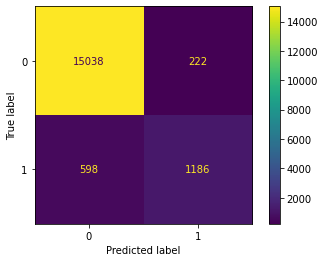

In [12]:
y_pred = clf.predict(X_test)
probs = clf.predict_proba(X_test)
#plot_confusion_matrix(model_result,  X_test, y_test) funcion deprecada en futuras versiones
cm = confusion_matrix(y_test,y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf.classes_)
disp.plot()
plt.show()

In [9]:
fpr, tpr, threshold = metrics.roc_curve(y_test, probs[:,1])
roc_auc = metrics.auc(fpr, tpr)
print(roc_auc)

0.9763850727891437


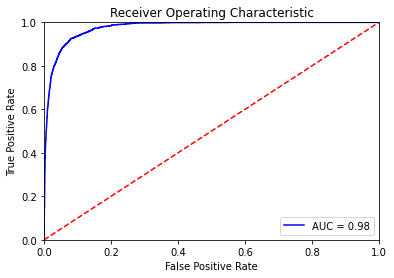

In [10]:
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [13]:
print(classification_report(y_test,y_pred,target_names=['0','1']))

              precision    recall  f1-score   support

           0       0.96      0.99      0.97     15260
           1       0.84      0.66      0.74      1784

    accuracy                           0.95     17044
   macro avg       0.90      0.83      0.86     17044
weighted avg       0.95      0.95      0.95     17044

